In [292]:
#importando bibliotecas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

from sklearn.metrics import r2_score

In [293]:
df = pd.read_csv('comp_bikes_mod.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [294]:
print(f'Qtds de colunas: {df.shape[1]}')
print(f'Qtds de Linhas: {df.shape[0]}')

Qtds de colunas: 17
Qtds de Linhas: 17379


In [295]:
# Tipos de dados presentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [296]:
# Verificando a quantidade de valores null
df.isnull().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [297]:
# Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?
x = df[['temp']].isnull().sum()[0]
print(f'Proporção N/A em "temp": {round(x/len(df) * 100,2)}%')

Proporção N/A em "temp": 10.0%


In [298]:
# Retirando os valores N/A da coluna "dteday"
df.dropna(subset=['dteday'], inplace=True)
print(f'New_Shape: {df.shape}')

New_Shape: (15641, 17)


In [299]:
# Alguns dados estatísticos
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [300]:
#Transformar a coluna "season" em valores categóricos.
df['season'] = pd.Categorical(df['season'])

print('Quantas categorias diferentes existem?: ', end=' ')
df["season"].dtypes

Quantas categorias diferentes existem?:  

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=False)

In [301]:
# Transformar a coluna "dteday" no tipo "datetime".

df['dteday'] = pd.to_datetime(df['dteday'])

# Qual é a última data presente no dataset ( YYYY-MM-DD)?
df["dteday"].iloc[[-1]]

17378   2012-12-31
Name: dteday, dtype: datetime64[ns]

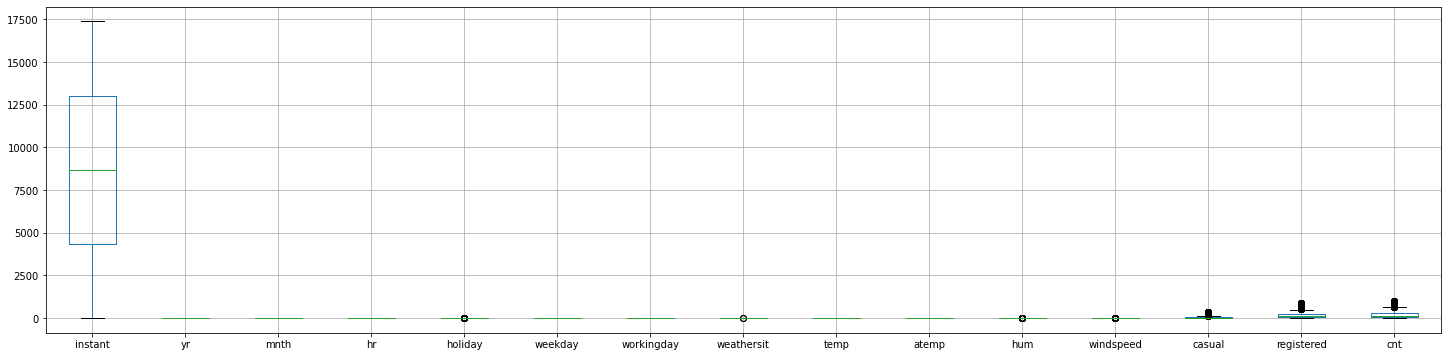

In [302]:
# Boxplot dos dados
ax = df.boxplot(figsize=(25,6))

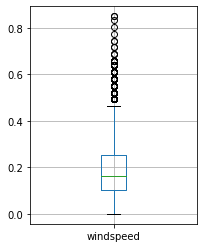

In [303]:
# Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?
ax = df[['windspeed']].boxplot(figsize=(3,4))


<font color='red'>R: </font> Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot. 

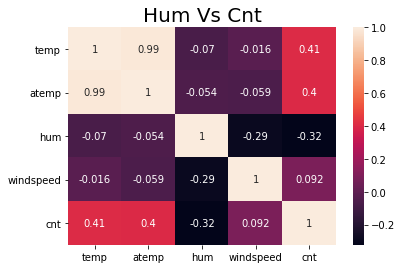

In [304]:
# Selecione as colunas "season", "temp", "atemp", "hum", "windspeed", "cnt". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:
df_corr = df[["season", "temp", "atemp", "hum", "windspeed", "cnt"]].corr()
sns.heatmap(df_corr, annot=True)
ax = plt.title('Hum Vs Cnt', fontsize=20)

<font color='red'>R: </font> Possuem baixa correlação linear negativa.

Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

In [308]:
#Preenchendo valores nulos das colunas pela média

df_new = df[['hum','cnt','casual']]

df_new = df_new.fillna(df_new.mean())
df_new.isnull().sum()

hum       0
cnt       0
casual    0
dtype: int64

In [312]:
# Criando a feature e label

features = np.array(df_new[["hum", "casual"]])
label = np.array(df_new['cnt'])

#### LinearRegression

**Utilizamos a entradas como teste**

In [317]:
from sklearn.linear_model import LinearRegression

Lr = LinearRegression()
Lr.fit(features, label)
predict = Lr.predict(features)
result_lr = r2_score(label, predict)

print(f'R2 da LinearRegression : {round(result_lr * 100, 2)}%')

R2 da LinearRegression : 40.6%


#### DecisionTreeRegressor

In [319]:
from sklearn.tree import DecisionTreeRegressor

Dtr = DecisionTreeRegressor()
Dtr.fit(features, label)
predict = Dtr.predict(features)
result_dtr = r2_score(label, predict)

print(f'R2 da DecisionTreeRegressor: {round(result_dtr * 100, 2)}%')

R2 da DecisionTreeRegressor: 70.98%


**Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:**

<font color='red'>R: </font> O valor obtido pela árvore de decisão como regressor apresenta maior R2 